In [19]:
import numpy as np
import tensorflow as tf
import os

In [20]:
X_train = np.load('data/X_train.npy')
X_test = np.load('data/X_test.npy')
y_train = np.load('data/y_train.npy')

In [21]:
# kiểm tra số mẫu dữ liệu
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)


(60000, 784)
(60000,)
(10000, 784)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17640\445300790.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i+1)


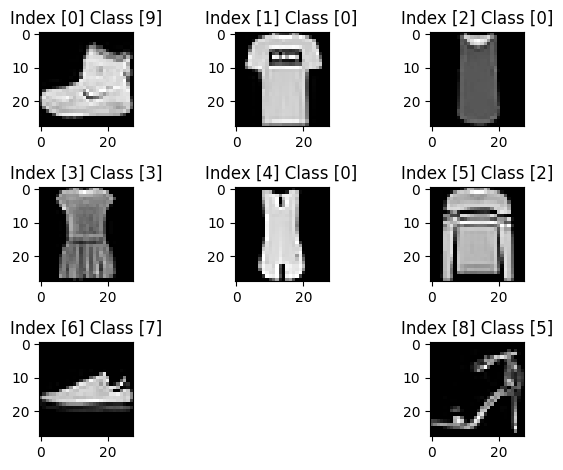

In [22]:
import matplotlib.pyplot as plt  # data visualization
np.random.seed(2)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[[i]].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Index {} Class {}".format([i], y_train[[i]]))
    plt.tight_layout()


In [23]:
# chuyển dữ liệu y_train từ label sang encode
# chuyển dữ liệu x_train về khoảng 0 và 1
from tensorflow.keras.utils import to_categorical
x_train, x_test = X_train / 255.0, X_test / 255.0
y_train = to_categorical(y_train)
print(y_train[:9])


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [24]:
x_train = np.reshape(x_train, (60000, 28, 28))



In [25]:
import tensorflow as tf
#định nghĩa hàm loss
loss_fn = tf.keras.losses.CategoricalCrossentropy()
# định nghĩa thuật toán tối ưu
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
# xây dựng mô hình
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        # tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss=loss_fn,
                  metrics=['accuracy'])
    return model


In [26]:
# tạo mô hình và in ra bảng tổng kết
model = create_model()
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 256)               33024     
                                                                 
 dense_18 (Dense)            (None, 256)               65792     
                                                                 
 dense_19 (Dense)            (None, 10)                2570      
                                                                 
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________


In [27]:
# xây dựng hàm lưu lại mô hình dựa theo loss của tập validation
item_filepath = './items/'
callback = tf.keras.callbacks.ModelCheckpoint(filepath=item_filepath, monitor='val_loss', verbose=1,
                                              save_best_only=False, save_weights_only=False)
# bắt đầu training
his = model.fit(x_train, y_train, epochs=50, batch_size=128,
                validation_split=0.2, callbacks=callback)


Epoch 1/50
374/375 [============================>.] - ETA: 0s - loss: 1.2718 - accuracy: 0.6129
Epoch 1: saving model to ./items\
INFO:tensorflow:Assets written to: ./items\assets
375/375 [==============================] - 3s 7ms/step - loss: 1.2704 - accuracy: 0.6133 - val_loss: 0.7690 - val_accuracy: 0.7367
Epoch 2/50
365/375 [============================>.] - ETA: 0s - loss: 0.6972 - accuracy: 0.7619
Epoch 2: saving model to ./items\
INFO:tensorflow:Assets written to: ./items\assets
375/375 [==============================] - 2s 6ms/step - loss: 0.6957 - accuracy: 0.7623 - val_loss: 0.6301 - val_accuracy: 0.7859
Epoch 3/50
368/375 [============================>.] - ETA: 0s - loss: 0.5943 - accuracy: 0.7966
Epoch 3: saving model to ./items\
INFO:tensorflow:Assets written to: ./items\assets
375/375 [==============================] - 2s 6ms/step - loss: 0.5941 - accuracy: 0.7967 - val_loss: 0.5654 - val_accuracy: 0.8054
Epoch 4/50
363/375 [============================>.] - ETA: 0s - los

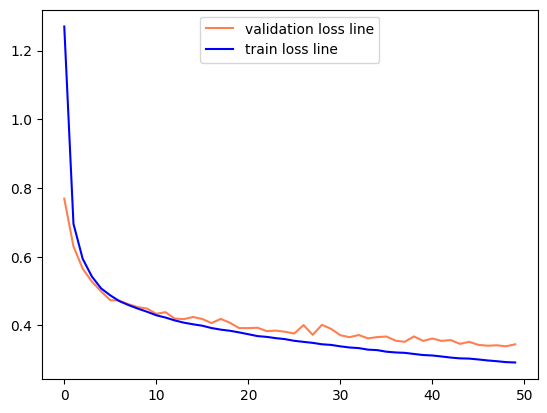

In [28]:
# vẽ đường loss trên tập train và tập validation
plt.plot(his.history['val_loss'], c='coral', label='validation loss line')
plt.plot(his.history['loss'], c='blue', label='train loss line')
legend = plt.legend(loc='upper center')
plt.show()


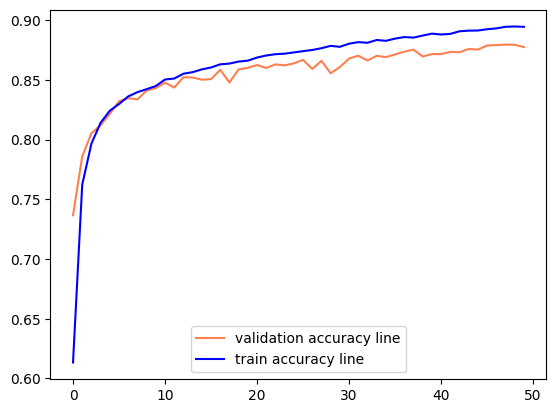

In [29]:
# vẽ đường accuracy trên tập train và tập validation
plt.plot(his.history['val_accuracy'], c='coral',
         label='validation accuracy line')
plt.plot(his.history['accuracy'], c='blue', label='train accuracy line')
legend = plt.legend(loc='lower center')
plt.show()


In [34]:
X_test = np.reshape(X_test, (10000, 28, 28))

# Load file mô hình đã huấn luyện
model = create_model()
model = tf.keras.models.load_model('./items/')
# Đánh giá mô hình trên tập test
loss, acc = model.evaluate(X_test,y_train, verbose=0)
print('loss tập test = ', loss,'| accuracy tập test = ', acc)

ValueError: Data cardinality is ambiguous:
  x sizes: 10000
  y sizes: 60000
Make sure all arrays contain the same number of samples.

In [ ]:
# lấy 1 hình ảnh bất kỳ ở tập test và dự đoán
# import numpy as np
# input_image = x_test[99]
# plt.imshow(input_image, cmap=plt.get_cmap('gray'))
# print('shape của 1 bức ảnh', input_image.shape)
# input_image = np.expand_dims(input_image, axis=0)
# print('shape phù hợp với mô hình là 3 chiều', input_image.shape)
# output = model.predict(input_image)
# print('số dự đoán là :', output.argmax())
